<a href="https://colab.research.google.com/github/jhmoon19/Tensorflow_NLP/blob/main/8_2_gpt2_p_tuning_NSMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/requirements.txt -O requirements.txt
!pip install -r requirements.txt
!pip install tensorflow

--2023-04-29 16:58:07--  https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 610 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     610  --.-KB/s    in 0s      

2023-04-29 16:58:07 (29.5 MB/s) - ‘requirements.txt’ saved [610/610]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 36.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s 

In [2]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.6 MB/s eta 0:00:00


In [3]:
!pip install gluonnlp==0.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.9.1-cp310-cp310-linux_x86_64.whl size=557741 sha256=78331d356eca527778e97a74ec2bce03243653e45bd004df29ea941a07e94fc6
  Stored in directory: /root/.cache/pip/wheels/fc/5b/9c/3295bb07f7c5544a96303a48988707816f44a536e8e1413922
Successfully built gluonnlp


In [4]:
!pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.1 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [5]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.7 MB/s eta 0:00:00


In [6]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=1fa4bb9d93ac8b50208cb1396eb75d5219b63c76056e641eab137d9c30391141
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [7]:
!mkdir -p data_in/KOR/naver_movie
!wget https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/7.PRETRAIN_METHOD/data_in/KOR/naver_movie/ratings_train.txt \
              -O data_in/KOR/naver_movie/ratings_train.txt
!wget https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/7.PRETRAIN_METHOD/data_in/KOR/naver_movie/ratings_test.txt \
              -O data_in/KOR/naver_movie/ratings_test.txt

--2023-04-29 17:00:32--  https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/7.PRETRAIN_METHOD/data_in/KOR/naver_movie/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘data_in/KOR/naver_movie/ratings_train.txt’

data_in/KOR/naver_m 100%[===================>]  13.95M  --.-KB/s    in 0.1s    

2023-04-29 17:00:32 (128 MB/s) - ‘data_in/KOR/naver_movie/ratings_train.txt’ saved [14628807/14628807]

--2023-04-29 17:00:32--  https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/7.PRETRAIN_METHOD/data_in/KOR/naver_movie/ratings_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.gi

In [8]:
import os
import tensorflow as tf
from transformers import TFGPT2LMHeadModel

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import gluonnlp as nlp
import sentencepiece as sp

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import re

In [9]:
import wget
import zipfile

wget.download('https://github.com/NLP-kr/tensorflow-ml-nlp-tf2/releases/download/v1.0/gpt_ckpt.zip')

with zipfile.ZipFile('gpt_ckpt.zip') as z:
    z.extractall()

In [10]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [11]:
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)
np.random.seed(SEED_NUM)

In [18]:
class TFGPT2PtuningClassifier(tf.keras.Model):
    def __init__(self, dir_path):
        super(TFGPT2PtuningClassifier, self).__init__()
        
        self.gpt2 = TFGPT2LMHeadModel.from_pretrained(dir_path)
        self.gpt2.trainable = False

        self.prompt_embedding_size = self.gpt2.config.hidden_size
        self.prompt_emgedding = tf.keras.layers.Embedding(2, self.prompt_embedding_size, name='prompt_embedding')
        
        self.bilstm = tf.keras.Sequential(name='prompt_bilstm')
        self.bilstm.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(self.prompt_embedding_size, return_sequences=True)))
        self.bilstm.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(self.prompt_embedding_size, return_sequences=True)))
        
        self.mlp = tf.keras.Sequential(name='prompt_mlp')
        self.mlp.add(tf.keras.layers.Dense(self.prompt_embedding_size))
        self.mlp.add(tf.keras.layers.ReLU())
        self.mlp.add(tf.keras.layers.Dense(self.prompt_embedding_size))

    def generate_prompt_input(self, inputs_ids):
        inputs_embeds = self.gpt2.transformer.wte(inputs_ids[:, 1:-1])

        prompt_indexs = tf.concat([inputs_ids[:, 0:1], inputs_ids[:, -1:]], axis=-1)
        prompt_embeds = self.prompt_emgedding(prompt_indexs)
        prompt_embeds = self.bilstm(prompt_embeds)
        prompt_embeds = self.mlp(prompt_embeds)
  
        prompt_updated_inputs = tf.concat([prompt_embeds[:, 0:1, :], inputs_embeds, 
                                  prompt_embeds[:, 1:, :]],
                                  axis=1)
        
        return prompt_updated_inputs
        
    def call(self, inputs):
        input_ids = inputs[0]
        attention_mask = inputs[1] if len(inputs) > 1 else None

        inputs_embeds = self.generate_prompt_input(input_ids)
        last_hidden_states = self.gpt2({'input_ids': None,
                                        'inputs_embeds': inputs_embeds,
                                        'attention_mask': attention_mask})
        last_hidden_states = last_hidden_states[0]
        output = last_hidden_states[:, -1, :]

        return output

In [20]:
BATCH_SIZE = 32
NUM_EPOCHS = 3
VALID_SPLIT = 0.1
SENT_MAX_LEN = 39

TOKENIZER_PATH = './gpt_ckpt/gpt2_kor_tokenizer.spiece'

tokenizer = sp.SentencePieceProcessor(TOKENIZER_PATH)
vocab = nlp.vocab.BERTVocab.from_sentencepiece(TOKENIZER_PATH,
                                               mask_token=None,
                                               sep_token='<unused0>',
                                               cls_token=None,
                                               unknown_token='<unk>',
                                               padding_token='<pad>',
                                               bos_token='<s>',
                                               eos_token='</s>')

DATA_IN_PATH = './data_in/KOR'
DATA_OUT_PATH = "./data_out/KOR"

DATA_TRAIN_PATH = os.path.join(DATA_IN_PATH, "naver_movie", "ratings_train.txt")
DATA_TEST_PATH = os.path.join(DATA_IN_PATH, "naver_movie", "ratings_test.txt")

train_data = pd.read_csv(DATA_TRAIN_PATH, header = 0, delimiter = '\t', quoting = 3)
train_data = train_data.dropna()
train_data = train_data[:50]

def clean_text(sent):
    sent_clean = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", sent)
    return sent_clean

def add_prompt_token(tokens):
    return [0] + tokens + [1]

train_data_sents = []
train_attn_mask = []
train_data_labels = []

for train_sent, train_label in train_data[['document', 'label']].values:
    train_text_label = '긍정' if train_label == 1 else '부정'

    train_tokenized_text = vocab[tokenizer.encode_as_pieces(clean_text(train_sent))]

    tokens = [vocab[vocab.bos_token]]  
    tokens += pad_sequences([train_tokenized_text], 
                            SENT_MAX_LEN, 
                            value=vocab[vocab.padding_token], 
                            padding='post').tolist()[0] 
    tokens = add_prompt_token(tokens)

    train_attn_mask.append([1 if t != 3 else 0 for t in tokens])
    train_data_sents.append(tokens)

    label = vocab[tokenizer.encode_as_pieces('긍정')] if train_label == 1 \
            else vocab[tokenizer.encode_as_pieces('부정')]
    train_data_labels.append(label)

train_attn_mask = np.array(train_attn_mask, dtype=np.int64)
train_data_sents = np.array(train_data_sents, dtype=np.int64)
train_data_labels = np.array(train_data_labels, dtype=np.int64)

print('입력 토큰 인덱스: ', train_data_sents[0])
print('어텐션 마스크: ', train_attn_mask[0])
print('정답 라벨: ', train_data_labels[0])

입력 토큰 인덱스:  [    0     0   134   280 48212  7175  5895 47643 47491  7974  9092     3
     3     3     3     3     3     3     3     3     3     3     3     3
     3     3     3     3     3     3     3     3     3     3     3     3
     3     3     3     3     3     1]
어텐션 마스크:  [1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1]
정답 라벨:  [2473]


In [21]:
BASE_MODEL_PATH = './gpt_ckpt'
cls_model = TFGPT2PtuningClassifier(dir_path=BASE_MODEL_PATH)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
cls_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

model_name = "tf2_gpt2_ptuning_naver_movie"

earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)

checkpoint_path = os.path.join(DATA_OUT_PATH, model_name, 'weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

history = cls_model.fit((train_data_sents, train_attn_mask), train_data_labels, 
                        epochs=NUM_EPOCHS, 
                        batch_size=BATCH_SIZE,
                        validation_split=VALID_SPLIT, 
                        callbacks=[earlystop_callback, cp_callback])

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at ./gpt_ckpt.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


./data_out/KOR/tf2_gpt2_ptuning_naver_movie -- Folder already exists 

Epoch 1/3
2/2 [==============================] - ETA: 0s - loss: 16.1082 - accuracy: 0.0000e+00 
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to ./data_out/KOR/tf2_gpt2_ptuning_naver_movie/weights.h5
2/2 [==============================] - 70s 17s/step - loss: 16.1082 - accuracy: 0.0000e+00 - val_loss: 20.4095 - val_accuracy: 0.0000e+00
Epoch 2/3
2/2 [==============================] - ETA: 0s - loss: 17.5979 - accuracy: 0.0000e+00 
Epoch 2: val_accuracy did not improve from 0.00000
2/2 [==============================] - 28s 11s/step - loss: 17.5979 - accuracy: 0.0000e+00 - val_loss: 19.4719 - val_accuracy: 0.0000e+00
Epoch 3/3
2/2 [==============================] - ETA: 0s - loss: 17.6869 - accuracy: 0.0000e+00 
Epoch 3: val_accuracy did not improve from 0.00000
2/2 [==============================] - 31s 11s/step - loss: 17.6869 - accuracy: 0.0000e+00 - val_loss: 18.1799 - val_accuracy: 0.0000e+0

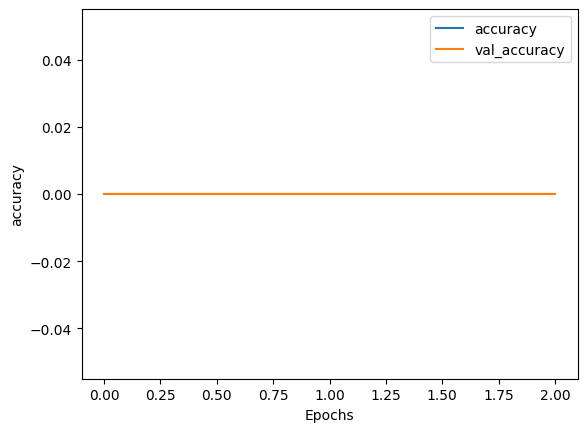

In [22]:
plot_graphs(history, 'accuracy')

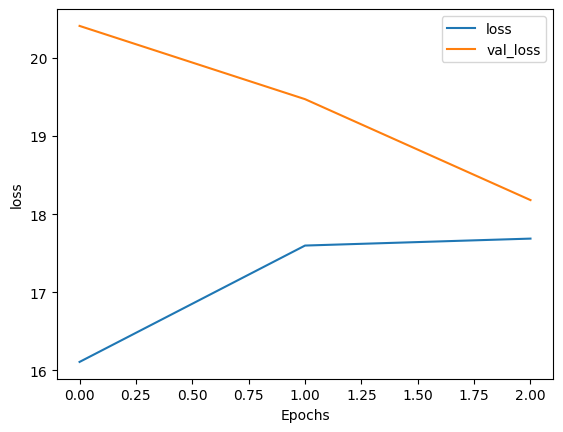

In [23]:
plot_graphs(history, 'loss')

In [25]:
test_data = pd.read_csv(DATA_TEST_PATH, header=0, delimiter='\t', quoting=3)
test_data = test_data.dropna()
test_data = test_data[:50] # for test

test_data_sents = []
test_data_labels = []
test_attn_mask = []

pred_tokens = []


for test_sent, test_label in test_data[['document', 'label']].values:
    test_tokenized_text = vocab[tokenizer.encode_as_pieces(clean_text(test_sent))]

    tokens = []
    tokens += pad_sequences([test_tokenized_text], 
                            SENT_MAX_LEN, 
                            value=vocab[vocab.padding_token], 
                            padding='post').tolist()[0] 
    tokens = add_prompt_token(tokens)
    test_data_sents.append(tokens)
    mask = [1 if t != 3 else 0 for t in tokens]
    test_attn_mask.append(mask)

    label = vocab[tokenizer.encode_as_pieces('긍정')] if test_label == 1 \
            else vocab[tokenizer.encode_as_pieces('부정')]
    test_data_labels.append(label)
    
test_attn_mask = np.array(test_attn_mask, dtype=np.int64)
test_data_sents = np.array(test_data_sents, dtype=np.int64)
test_data_labels = np.array(test_data_labels, dtype=np.int64)

print("num sents, labels {}, {}".format(len(test_data_sents), len(test_data_labels)))

cls_model.load_weights(checkpoint_path)

results = cls_model.evaluate((test_data_sents, test_attn_mask), test_data_labels, batch_size=1024)
print("test loss, test acc: ", results)

num sents, labels 50, 50
1/1 [==============================] - 20s 20s/step - loss: 22.4556 - accuracy: 0.0000e+00
test loss, test acc:  [22.45557403564453, 0.0]
